<a href="https://colab.research.google.com/github/Giuliafranchi1/Algorithm_massivedata/blob/master/FRANCHI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as t
from torch import nn
import os
from glob import glob

t.manual_seed(1) #reproducibility

#set GPU
device = t.device("cuda" if t.cuda.is_available() else "cpu")
print(f"Using {device} device")


Using cpu device


In [ ]:
#Import dataset from Kaggle

!mkdir -p /root/.kaggle
!echo '{"username":"giuliafranchi","key":"4cfe8adf4b6fb74cc4f72ff3a92f971f"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.56G/6.56G [03:37<00:00, 29.5MB/s]
100% 6.56G/6.56G [03:37<00:00, 32.3MB/s]


In [ ]:
!unzip plant-leaves-for-image-classification.zip

Archive:  plant-leaves-for-image-classification.zip
  inflating: Plants_2/images to predict/0001_0170.JPG  
  inflating: Plants_2/images to predict/0003_0179.JPG  
  inflating: Plants_2/images to predict/0005_0268.JPG  
  inflating: Plants_2/images to predict/0008_0148.JPG  
  inflating: Plants_2/images to predict/0015_0123.JPG  
  inflating: Plants_2/images to predict/0016_0118.JPG  
  inflating: Plants_2/images to predict/0019_0276.JPG  
  inflating: Plants_2/images to predict/0020_0271.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0006.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0007.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0008.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0009.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0010.JPG  
  inflating: Plants_2/test/Alstonia Scholaris healthy (P2b)/0003_0006.JPG  
  inflating: Plants_2/test/Alstonia Sch

## Pre-processing

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from tqdm import tqdm

#access to the folder of imgs and labels
img_names = np.array(list(glob('./Plants_2/*/*/*')))

loaded_imgs = [] #images
loaded_labels = [] #names of plants species
loaded_modes = [] #train/valid/test
print(f"{len(img_names)=}") #4494
for img_name in tqdm(img_names):

  img = np.array(
      Image.open(img_name).convert('L') #grey scale from PIL library
  )
  resize_factor = 30
  new_shape = (np.array(img.shape) / resize_factor).astype(int)
  img_resized = resize(img, new_shape)
  img_cropped = img_resized[
      400// resize_factor:-400//resize_factor,
      400//resize_factor:-400//resize_factor
  ]
  img = img_cropped
  img = t.from_numpy(img) #convert img into tensor
  
  label = img_name.split('/')[-2].split(' ')[0] #plant name
  mode = img_name.split('/')[2] #train/valid/test
  loaded_imgs.append(img)
  loaded_labels.append(label)
  #if mode != 'train':
    #print(mode)
  loaded_modes.append(mode)

print(f"Train: {len([l for l in loaded_modes if l == 'train'])}") #4274
print(f"Test: {len([l for l in loaded_modes if l == 'test'])}") #110
print(f"Valid: {len([l for l in loaded_modes if l == 'valid'])}") #110

len(img_names)=4494


  0%|          | 9/4494 [00:53<7:21:17,  5.90s/it]


KeyboardInterrupt: ignored

In [ ]:
#divide each label and trasform from string into integer number 
unique_labels = list(set(loaded_labels))
numerical_labels = []
for label in loaded_labels:
    numerical_labels.append(
        unique_labels.index(label)
    )
numerical_labels = t.tensor(numerical_labels) #convert into tensor


# separate in train/test/valid/images to predict
unique_modes = list(set(loaded_modes))

dataloaders = {}
for mode in unique_modes:
  mask = [m == mode for m in loaded_modes] # [True, False, ...]
  labels = numerical_labels[mask]
  imgs = loaded_imgs[mask]
  # create dataset
  dataset = t.utils.data.TensorDataset(imgs, labels)
  # create dataloader + specify batch size + shuffle=True 
  dataloader = t.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
  dataloaders[mode] = dataloader

print(dataloaders)

Train: 4274
Test: 110
Valid: 110
{'test': <torch.utils.data.dataloader.DataLoader object at 0x7f13206dc370>, 'train': <torch.utils.data.dataloader.DataLoader object at 0x7f1310cf2dc0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f1310cfb1c0>}


In [ ]:
train_dataloader = dataloaders['train']

for batch_imgs, batch_labels in train_dataloader:
  print(batch_imgs.shape) # shape = [64, 106, 173]
  print(batch_labels.shape) # shape = [64]

torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch.Size([64])
torch.Size([64, 106, 173])
torch

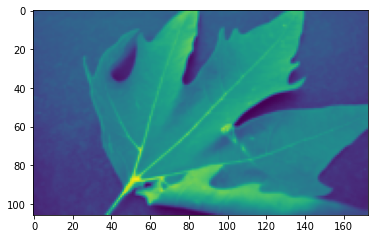

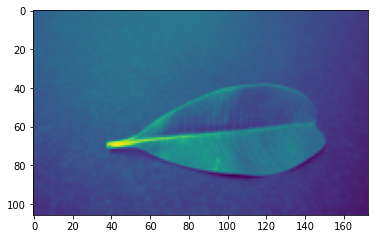

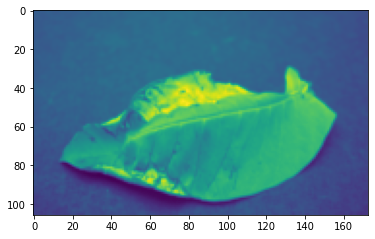

In [ ]:
#show one img for each mode: train, test, valid
plt.rcParams['figure.figsize'] = [20, 10]
for imgs, labels in dataloaders['train']:
  plt.imshow(imgs[0])
  plt.show()
  break

for imgs, labels in dataloaders['test']:
  plt.imshow(imgs[0])
  plt.show()
  break

for imgs, labels in dataloaders['valid']:
  plt.imshow(imgs[0])
  plt.show()
  break

## Model for my neural network

In [ ]:
#my neural model 

#general structure of my model
def conv_block(in_c, out_c, k=3, pad=1):
    return nn.Sequential(
        nn.BatchNorm2d(in_c),
        nn.Conv2d(
            in_c,
            out_c,
            k,
            padding=pad,
            bias=False #no need with BatchNorm!
        ), 
        nn.Dropout(0.2),
        nn.MaxPool2d(2), # [B, out_c, (W - 1)/2, (H-1)/2]
        nn.ReLU()
    )

model = nn.Sequential(
      conv_block(1, 16), #->shape=[B, C=1, W, H]-> out shape = [B, 16, W-1, H-1]
      conv_block(16, 32),
      conv_block(32, 64),
      conv_block(64, 128),
      conv_block(128, 256),
      conv_block(256, 512),
      nn.Flatten(),  #y = y.view(batch_size, -1)->flattening (B, ???)
      nn.Linear(1024, 256), # -> [B, 512, k, l] -> [B, 512*k*l] -> ? -> [B, 12]
      nn.ReLU(),
      nn.Linear(256, 12),
      nn.Softmax(1)
).to(device) #device=GPU

total_params = 0
#for each layer print the number of parameters
for name, param in model.named_parameters():
    num_params = param.numel()
    print(f"{name}: {num_params}")
    total_params += num_params

print(f"Total number of parameters": {total_params}")


## Training

In [ ]:
from tqdm import tqdm


optim = t.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = t.nn.CrossEntropyLoss()
n_epochs = 500

def train_single_epoch():
  tot_loss = 0
  n_imgs = 0
  for img, label in tqdm(dataloaders['train']):
    label = label.to(device)
    batch_size = img.shape[0]
    img = img.to(device)
    optim.zero_grad()
    img = (img[:, None] / 255).float()
    pred_label = model(img)
    loss = loss_fn(pred_label, label) 
    loss.backward()
    optim.step() 
    tot_loss += loss.item()
    n_imgs += batch_size
  return (tot_loss / n_imgs)
  
def test(dataloader):
  with t.no_grad():
    tot_loss = 0
    n_imgs = 0
    correct_preds = 0 
    for batch_imgs, batch_labels in tqdm(dataloader):
      batch_labels = batch_labels.to(device)
      batch_imgs = batch_imgs.to(device)
      batch_size = batch_imgs.shape[0]
      batch_imgs = (
          batch_imgs[:, None]/ 255 #normalization of imgs-> pixels 0-255
      ).float()
      pred_batch_labels = model(batch_imgs)
      pred_batch_class = t.argmax(pred_batch_labels, dim=1)
      correct_preds += (pred_batch_class == batch_labels).sum()
      loss = loss_fn(pred_batch_labels, batch_labels)
      tot_loss += loss.item()
      n_imgs += batch_size

    mean_loss = tot_loss / n_imgs
    accuracy = correct_preds / n_imgs

  return mean_loss, accuracy

def train():
  train_losses = []
  val_losses = []
  val_accs = []
  for epoch in range(n_epochs):
      train_loss = train_single_epoch()
      val_loss, val_acc = test(dataloaders['test']) #testing
      print(
        f"\nEpoch: {epoch}, train_loss={train_loss:.4f} val_loss={val_loss:.4f} val_acc={val_acc:.4f}"
      )

  #plotting
  fig, axes = plt.subplots(2, 1)
  axes[0].plot(t.arange(n_epochs), train_losses, label='train_loss')
  axes[0].plot(t.arange(n_epochs), val_losses, label='val_loss')
  axes[0].legend()
  axes[1].plot(t.arange(n_epochs), val_accs, label='val_accuracy')
  axes[1].legend()
  plt.show()

In [ ]:
train()

100%|██████████| 2/2 [00:00<00:00, 108.50it/s]



Epoch: 0, train_loss=0.0386 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 107.26it/s]



Epoch: 1, train_loss=0.0384 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 112.69it/s]



Epoch: 2, train_loss=0.0384 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 110.12it/s]



Epoch: 3, train_loss=0.0384 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.93it/s]



Epoch: 4, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 107.77it/s]



Epoch: 5, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 92.56it/s]



Epoch: 6, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 95.40it/s]



Epoch: 7, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 86.61it/s]



Epoch: 8, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 92.23it/s]



Epoch: 9, train_loss=0.0383 val_loss=0.0454 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.12it/s]



Epoch: 10, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.46it/s]



Epoch: 11, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 107.87it/s]



Epoch: 12, train_loss=0.0384 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.75it/s]



Epoch: 13, train_loss=0.0383 val_loss=0.0451 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.24it/s]



Epoch: 14, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.06it/s]



Epoch: 15, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.36it/s]



Epoch: 16, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.31it/s]



Epoch: 17, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 100.01it/s]



Epoch: 18, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 101.18it/s]



Epoch: 19, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 107.58it/s]



Epoch: 20, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.86it/s]



Epoch: 21, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 92.59it/s]



Epoch: 22, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.82it/s]



Epoch: 23, train_loss=0.0384 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 101.62it/s]



Epoch: 24, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 110.25it/s]



Epoch: 25, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.74it/s]



Epoch: 26, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.33it/s]



Epoch: 27, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 111.18it/s]



Epoch: 28, train_loss=0.0383 val_loss=0.0454 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 102.56it/s]



Epoch: 29, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 40.10it/s]



Epoch: 30, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.31it/s]



Epoch: 31, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 95.91it/s]



Epoch: 32, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.62it/s]



Epoch: 33, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.22it/s]



Epoch: 34, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.65it/s]



Epoch: 35, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 89.97it/s]



Epoch: 36, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 102.06it/s]



Epoch: 37, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 112.56it/s]



Epoch: 38, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.00it/s]



Epoch: 39, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.13it/s]



Epoch: 40, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 89.99it/s]



Epoch: 41, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.05it/s]



Epoch: 42, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.70it/s]



Epoch: 43, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 98.61it/s]



Epoch: 44, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.69it/s]



Epoch: 45, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.55it/s]



Epoch: 46, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 111.64it/s]



Epoch: 47, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 111.60it/s]



Epoch: 48, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.59it/s]



Epoch: 49, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 106.16it/s]



Epoch: 50, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 82.04it/s]



Epoch: 51, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 101.95it/s]



Epoch: 52, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 105.67it/s]



Epoch: 53, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 97.04it/s]



Epoch: 54, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.00it/s]



Epoch: 55, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 110.72it/s]



Epoch: 56, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 97.15it/s]



Epoch: 57, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 62.03it/s]



Epoch: 58, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 89.74it/s]



Epoch: 59, train_loss=0.0383 val_loss=0.0452 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 104.55it/s]



Epoch: 60, train_loss=0.0383 val_loss=0.0453 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.18it/s]



Epoch: 61, train_loss=0.0382 val_loss=0.0451 val_acc=0.0909


100%|██████████| 2/2 [00:00<00:00, 108.41it/s]



Epoch: 62, train_loss=0.0382 val_loss=0.0444 val_acc=0.1818


100%|██████████| 2/2 [00:00<00:00, 109.64it/s]



Epoch: 63, train_loss=0.0370 val_loss=0.0436 val_acc=0.2091


100%|██████████| 2/2 [00:00<00:00, 99.41it/s]



Epoch: 64, train_loss=0.0364 val_loss=0.0435 val_acc=0.2364


100%|██████████| 2/2 [00:00<00:00, 112.63it/s]



Epoch: 65, train_loss=0.0365 val_loss=0.0435 val_acc=0.2182


100%|██████████| 2/2 [00:00<00:00, 90.79it/s]



Epoch: 66, train_loss=0.0365 val_loss=0.0431 val_acc=0.2273


100%|██████████| 2/2 [00:00<00:00, 105.25it/s]



Epoch: 67, train_loss=0.0358 val_loss=0.0434 val_acc=0.2273


100%|██████████| 2/2 [00:00<00:00, 105.84it/s]



Epoch: 68, train_loss=0.0359 val_loss=0.0437 val_acc=0.2182


100%|██████████| 2/2 [00:00<00:00, 106.43it/s]



Epoch: 69, train_loss=0.0357 val_loss=0.0426 val_acc=0.2727


100%|██████████| 2/2 [00:00<00:00, 107.49it/s]



Epoch: 70, train_loss=0.0354 val_loss=0.0426 val_acc=0.2727


100%|██████████| 2/2 [00:00<00:00, 106.32it/s]



Epoch: 71, train_loss=0.0351 val_loss=0.0423 val_acc=0.3091


100%|██████████| 2/2 [00:00<00:00, 106.22it/s]



Epoch: 72, train_loss=0.0351 val_loss=0.0421 val_acc=0.3091


100%|██████████| 2/2 [00:00<00:00, 106.85it/s]



Epoch: 73, train_loss=0.0350 val_loss=0.0424 val_acc=0.2727


100%|██████████| 2/2 [00:00<00:00, 102.02it/s]



Epoch: 74, train_loss=0.0350 val_loss=0.0417 val_acc=0.3273


100%|██████████| 2/2 [00:00<00:00, 89.14it/s]



Epoch: 75, train_loss=0.0349 val_loss=0.0420 val_acc=0.3182


100%|██████████| 2/2 [00:00<00:00, 112.53it/s]



Epoch: 76, train_loss=0.0351 val_loss=0.0421 val_acc=0.2909


100%|██████████| 2/2 [00:00<00:00, 114.58it/s]



Epoch: 77, train_loss=0.0346 val_loss=0.0412 val_acc=0.3364


100%|██████████| 2/2 [00:00<00:00, 109.62it/s]



Epoch: 78, train_loss=0.0345 val_loss=0.0411 val_acc=0.3636


100%|██████████| 2/2 [00:00<00:00, 107.42it/s]



Epoch: 79, train_loss=0.0343 val_loss=0.0412 val_acc=0.3818


100%|██████████| 2/2 [00:00<00:00, 107.06it/s]



Epoch: 80, train_loss=0.0343 val_loss=0.0412 val_acc=0.3727


100%|██████████| 2/2 [00:00<00:00, 99.74it/s]



Epoch: 81, train_loss=0.0341 val_loss=0.0404 val_acc=0.4091


100%|██████████| 2/2 [00:00<00:00, 80.88it/s]



Epoch: 82, train_loss=0.0337 val_loss=0.0399 val_acc=0.4182


100%|██████████| 2/2 [00:00<00:00, 84.28it/s]



Epoch: 83, train_loss=0.0336 val_loss=0.0402 val_acc=0.4091


100%|██████████| 2/2 [00:00<00:00, 88.21it/s]



Epoch: 84, train_loss=0.0334 val_loss=0.0403 val_acc=0.4000


100%|██████████| 2/2 [00:00<00:00, 109.84it/s]



Epoch: 85, train_loss=0.0336 val_loss=0.0405 val_acc=0.4000


100%|██████████| 2/2 [00:00<00:00, 104.41it/s]



Epoch: 86, train_loss=0.0338 val_loss=0.0405 val_acc=0.4000


100%|██████████| 2/2 [00:00<00:00, 103.49it/s]



Epoch: 87, train_loss=0.0331 val_loss=0.0397 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 101.75it/s]



Epoch: 88, train_loss=0.0334 val_loss=0.0399 val_acc=0.4273


100%|██████████| 2/2 [00:00<00:00, 80.38it/s]



Epoch: 89, train_loss=0.0339 val_loss=0.0413 val_acc=0.3636


100%|██████████| 2/2 [00:00<00:00, 100.92it/s]



Epoch: 90, train_loss=0.0330 val_loss=0.0402 val_acc=0.4182


100%|██████████| 2/2 [00:00<00:00, 105.71it/s]



Epoch: 91, train_loss=0.0332 val_loss=0.0397 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 104.98it/s]



Epoch: 92, train_loss=0.0328 val_loss=0.0397 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 108.58it/s]



Epoch: 93, train_loss=0.0340 val_loss=0.0434 val_acc=0.2364


100%|██████████| 2/2 [00:00<00:00, 107.59it/s]



Epoch: 94, train_loss=0.0343 val_loss=0.0402 val_acc=0.4091


100%|██████████| 2/2 [00:00<00:00, 111.38it/s]



Epoch: 95, train_loss=0.0328 val_loss=0.0394 val_acc=0.4273


100%|██████████| 2/2 [00:00<00:00, 107.73it/s]



Epoch: 96, train_loss=0.0327 val_loss=0.0397 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 84.87it/s]



Epoch: 97, train_loss=0.0326 val_loss=0.0393 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 93.74it/s]



Epoch: 98, train_loss=0.0328 val_loss=0.0399 val_acc=0.4273


100%|██████████| 2/2 [00:00<00:00, 111.53it/s]



Epoch: 99, train_loss=0.0328 val_loss=0.0398 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 99.80it/s]



Epoch: 100, train_loss=0.0327 val_loss=0.0395 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 104.36it/s]



Epoch: 101, train_loss=0.0323 val_loss=0.0397 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 108.71it/s]



Epoch: 102, train_loss=0.0323 val_loss=0.0400 val_acc=0.4273


100%|██████████| 2/2 [00:00<00:00, 111.91it/s]



Epoch: 103, train_loss=0.0321 val_loss=0.0395 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 102.41it/s]



Epoch: 104, train_loss=0.0323 val_loss=0.0393 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 103.91it/s]



Epoch: 105, train_loss=0.0321 val_loss=0.0395 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 105.93it/s]



Epoch: 106, train_loss=0.0320 val_loss=0.0395 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 91.89it/s]



Epoch: 107, train_loss=0.0322 val_loss=0.0393 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 104.14it/s]



Epoch: 108, train_loss=0.0319 val_loss=0.0397 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 99.62it/s]



Epoch: 109, train_loss=0.0324 val_loss=0.0395 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 102.63it/s]



Epoch: 110, train_loss=0.0322 val_loss=0.0392 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 108.72it/s]



Epoch: 111, train_loss=0.0321 val_loss=0.0394 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 102.30it/s]



Epoch: 112, train_loss=0.0318 val_loss=0.0397 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 100.54it/s]



Epoch: 113, train_loss=0.0317 val_loss=0.0394 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 108.22it/s]



Epoch: 114, train_loss=0.0325 val_loss=0.0394 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 112.06it/s]



Epoch: 115, train_loss=0.0317 val_loss=0.0392 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 104.67it/s]



Epoch: 116, train_loss=0.0318 val_loss=0.0399 val_acc=0.4273


100%|██████████| 2/2 [00:00<00:00, 106.68it/s]



Epoch: 117, train_loss=0.0319 val_loss=0.0395 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 103.52it/s]



Epoch: 118, train_loss=0.0316 val_loss=0.0392 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 87.59it/s]



Epoch: 119, train_loss=0.0317 val_loss=0.0395 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 92.46it/s]



Epoch: 120, train_loss=0.0315 val_loss=0.0395 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 83.33it/s]



Epoch: 121, train_loss=0.0315 val_loss=0.0391 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 104.11it/s]



Epoch: 122, train_loss=0.0316 val_loss=0.0397 val_acc=0.4455


100%|██████████| 2/2 [00:00<00:00, 104.91it/s]



Epoch: 123, train_loss=0.0318 val_loss=0.0392 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 109.90it/s]



Epoch: 124, train_loss=0.0317 val_loss=0.0394 val_acc=0.4364


100%|██████████| 2/2 [00:00<00:00, 106.13it/s]



Epoch: 125, train_loss=0.0325 val_loss=0.0397 val_acc=0.4182


100%|██████████| 2/2 [00:00<00:00, 89.94it/s]



Epoch: 126, train_loss=0.0320 val_loss=0.0393 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 107.46it/s]



Epoch: 127, train_loss=0.0314 val_loss=0.0393 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 108.05it/s]



Epoch: 128, train_loss=0.0314 val_loss=0.0392 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 107.57it/s]



Epoch: 129, train_loss=0.0315 val_loss=0.0389 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 99.74it/s]



Epoch: 130, train_loss=0.0313 val_loss=0.0386 val_acc=0.4909


100%|██████████| 2/2 [00:00<00:00, 104.09it/s]



Epoch: 131, train_loss=0.0315 val_loss=0.0388 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 103.76it/s]



Epoch: 132, train_loss=0.0313 val_loss=0.0387 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 101.31it/s]



Epoch: 133, train_loss=0.0312 val_loss=0.0387 val_acc=0.4909


100%|██████████| 2/2 [00:00<00:00, 102.67it/s]



Epoch: 134, train_loss=0.0312 val_loss=0.0381 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 100.99it/s]



Epoch: 135, train_loss=0.0314 val_loss=0.0389 val_acc=0.4818


100%|██████████| 2/2 [00:00<00:00, 105.96it/s]



Epoch: 136, train_loss=0.0319 val_loss=0.0392 val_acc=0.4545


100%|██████████| 2/2 [00:00<00:00, 105.81it/s]



Epoch: 137, train_loss=0.0315 val_loss=0.0389 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 105.37it/s]



Epoch: 138, train_loss=0.0314 val_loss=0.0383 val_acc=0.4909


100%|██████████| 2/2 [00:00<00:00, 103.18it/s]



Epoch: 139, train_loss=0.0314 val_loss=0.0387 val_acc=0.4818


100%|██████████| 2/2 [00:00<00:00, 103.99it/s]



Epoch: 140, train_loss=0.0313 val_loss=0.0386 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 107.83it/s]



Epoch: 141, train_loss=0.0312 val_loss=0.0380 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 100.98it/s]



Epoch: 142, train_loss=0.0312 val_loss=0.0393 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 96.04it/s]



Epoch: 143, train_loss=0.0313 val_loss=0.0387 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 105.47it/s]



Epoch: 144, train_loss=0.0312 val_loss=0.0387 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 107.98it/s]



Epoch: 145, train_loss=0.0313 val_loss=0.0386 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 109.32it/s]



Epoch: 146, train_loss=0.0313 val_loss=0.0387 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 108.76it/s]



Epoch: 147, train_loss=0.0312 val_loss=0.0389 val_acc=0.4636


100%|██████████| 2/2 [00:00<00:00, 109.79it/s]



Epoch: 148, train_loss=0.0312 val_loss=0.0380 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 88.71it/s]



Epoch: 149, train_loss=0.0311 val_loss=0.0383 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 89.34it/s]



Epoch: 150, train_loss=0.0315 val_loss=0.0403 val_acc=0.4000


100%|██████████| 2/2 [00:00<00:00, 105.21it/s]



Epoch: 151, train_loss=0.0326 val_loss=0.0390 val_acc=0.4818


100%|██████████| 2/2 [00:00<00:00, 104.86it/s]



Epoch: 152, train_loss=0.0314 val_loss=0.0384 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 107.99it/s]



Epoch: 153, train_loss=0.0312 val_loss=0.0377 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 104.22it/s]



Epoch: 154, train_loss=0.0314 val_loss=0.0382 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 102.21it/s]



Epoch: 155, train_loss=0.0311 val_loss=0.0384 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 93.22it/s]



Epoch: 156, train_loss=0.0311 val_loss=0.0385 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 95.77it/s]



Epoch: 157, train_loss=0.0312 val_loss=0.0389 val_acc=0.4818


100%|██████████| 2/2 [00:00<00:00, 97.91it/s]



Epoch: 158, train_loss=0.0314 val_loss=0.0390 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 85.18it/s]



Epoch: 159, train_loss=0.0313 val_loss=0.0381 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 106.14it/s]



Epoch: 160, train_loss=0.0312 val_loss=0.0382 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 105.59it/s]



Epoch: 161, train_loss=0.0311 val_loss=0.0388 val_acc=0.4909


100%|██████████| 2/2 [00:00<00:00, 101.66it/s]



Epoch: 162, train_loss=0.0311 val_loss=0.0384 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 100.11it/s]



Epoch: 163, train_loss=0.0312 val_loss=0.0382 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 112.26it/s]



Epoch: 164, train_loss=0.0311 val_loss=0.0380 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 98.90it/s]



Epoch: 165, train_loss=0.0313 val_loss=0.0397 val_acc=0.4091


100%|██████████| 2/2 [00:00<00:00, 99.42it/s]



Epoch: 166, train_loss=0.0314 val_loss=0.0380 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 106.06it/s]



Epoch: 167, train_loss=0.0313 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 103.94it/s]



Epoch: 168, train_loss=0.0311 val_loss=0.0378 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 104.30it/s]



Epoch: 169, train_loss=0.0311 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 110.16it/s]



Epoch: 170, train_loss=0.0315 val_loss=0.0401 val_acc=0.4182


100%|██████████| 2/2 [00:00<00:00, 104.18it/s]



Epoch: 171, train_loss=0.0316 val_loss=0.0377 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 105.99it/s]



Epoch: 172, train_loss=0.0313 val_loss=0.0382 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 88.94it/s]



Epoch: 173, train_loss=0.0313 val_loss=0.0379 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 106.72it/s]



Epoch: 174, train_loss=0.0311 val_loss=0.0384 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 105.22it/s]



Epoch: 175, train_loss=0.0318 val_loss=0.0388 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 106.26it/s]



Epoch: 176, train_loss=0.0317 val_loss=0.0378 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 108.43it/s]



Epoch: 177, train_loss=0.0312 val_loss=0.0377 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 106.83it/s]



Epoch: 178, train_loss=0.0312 val_loss=0.0373 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 105.09it/s]



Epoch: 179, train_loss=0.0309 val_loss=0.0383 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 71.06it/s]



Epoch: 180, train_loss=0.0310 val_loss=0.0380 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 88.76it/s]



Epoch: 181, train_loss=0.0310 val_loss=0.0383 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 102.66it/s]



Epoch: 182, train_loss=0.0311 val_loss=0.0379 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 76.64it/s]



Epoch: 183, train_loss=0.0311 val_loss=0.0373 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 105.86it/s]



Epoch: 184, train_loss=0.0309 val_loss=0.0384 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 105.62it/s]



Epoch: 185, train_loss=0.0311 val_loss=0.0381 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 102.74it/s]



Epoch: 186, train_loss=0.0310 val_loss=0.0381 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 106.08it/s]



Epoch: 187, train_loss=0.0310 val_loss=0.0380 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 100.61it/s]



Epoch: 188, train_loss=0.0309 val_loss=0.0388 val_acc=0.5000


100%|██████████| 2/2 [00:00<00:00, 106.74it/s]



Epoch: 189, train_loss=0.0311 val_loss=0.0379 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 102.97it/s]



Epoch: 190, train_loss=0.0309 val_loss=0.0379 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 105.79it/s]



Epoch: 191, train_loss=0.0309 val_loss=0.0376 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 105.54it/s]



Epoch: 192, train_loss=0.0308 val_loss=0.0386 val_acc=0.4909


100%|██████████| 2/2 [00:00<00:00, 99.39it/s]



Epoch: 193, train_loss=0.0310 val_loss=0.0376 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 104.74it/s]



Epoch: 194, train_loss=0.0314 val_loss=0.0373 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 100.66it/s]



Epoch: 195, train_loss=0.0309 val_loss=0.0379 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 86.79it/s]



Epoch: 196, train_loss=0.0309 val_loss=0.0380 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 108.57it/s]



Epoch: 197, train_loss=0.0315 val_loss=0.0380 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 101.17it/s]



Epoch: 198, train_loss=0.0316 val_loss=0.0376 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 104.12it/s]



Epoch: 199, train_loss=0.0312 val_loss=0.0379 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 104.33it/s]



Epoch: 200, train_loss=0.0310 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 103.13it/s]



Epoch: 201, train_loss=0.0308 val_loss=0.0374 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 98.47it/s]



Epoch: 202, train_loss=0.0308 val_loss=0.0374 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 101.50it/s]



Epoch: 203, train_loss=0.0310 val_loss=0.0377 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 108.54it/s]



Epoch: 204, train_loss=0.0307 val_loss=0.0378 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 105.85it/s]



Epoch: 205, train_loss=0.0309 val_loss=0.0381 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 106.50it/s]



Epoch: 206, train_loss=0.0307 val_loss=0.0379 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 102.14it/s]



Epoch: 207, train_loss=0.0307 val_loss=0.0374 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 92.08it/s]



Epoch: 208, train_loss=0.0310 val_loss=0.0380 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 105.40it/s]



Epoch: 209, train_loss=0.0307 val_loss=0.0378 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 80.83it/s]



Epoch: 210, train_loss=0.0307 val_loss=0.0374 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 103.66it/s]



Epoch: 211, train_loss=0.0309 val_loss=0.0378 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 107.21it/s]



Epoch: 212, train_loss=0.0310 val_loss=0.0370 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 105.97it/s]



Epoch: 213, train_loss=0.0307 val_loss=0.0377 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 106.04it/s]



Epoch: 214, train_loss=0.0307 val_loss=0.0380 val_acc=0.5091


100%|██████████| 2/2 [00:00<00:00, 88.72it/s]



Epoch: 215, train_loss=0.0309 val_loss=0.0374 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 103.40it/s]



Epoch: 216, train_loss=0.0308 val_loss=0.0382 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 98.85it/s]



Epoch: 217, train_loss=0.0308 val_loss=0.0376 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 100.24it/s]



Epoch: 218, train_loss=0.0306 val_loss=0.0389 val_acc=0.4727


100%|██████████| 2/2 [00:00<00:00, 105.69it/s]



Epoch: 219, train_loss=0.0312 val_loss=0.0379 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 113.79it/s]



Epoch: 220, train_loss=0.0306 val_loss=0.0376 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 106.02it/s]



Epoch: 221, train_loss=0.0305 val_loss=0.0373 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 106.67it/s]



Epoch: 222, train_loss=0.0304 val_loss=0.0373 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 106.10it/s]



Epoch: 223, train_loss=0.0307 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 106.50it/s]



Epoch: 224, train_loss=0.0306 val_loss=0.0379 val_acc=0.5182


100%|██████████| 2/2 [00:00<00:00, 101.01it/s]



Epoch: 225, train_loss=0.0302 val_loss=0.0370 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 107.71it/s]



Epoch: 226, train_loss=0.0304 val_loss=0.0374 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 107.42it/s]



Epoch: 227, train_loss=0.0302 val_loss=0.0373 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 104.34it/s]



Epoch: 228, train_loss=0.0302 val_loss=0.0373 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 103.41it/s]



Epoch: 229, train_loss=0.0301 val_loss=0.0375 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 107.69it/s]



Epoch: 230, train_loss=0.0300 val_loss=0.0371 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 88.73it/s]



Epoch: 231, train_loss=0.0302 val_loss=0.0371 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 99.71it/s]



Epoch: 232, train_loss=0.0300 val_loss=0.0377 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 88.96it/s]



Epoch: 233, train_loss=0.0301 val_loss=0.0378 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 90.28it/s]



Epoch: 234, train_loss=0.0303 val_loss=0.0377 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 89.05it/s]



Epoch: 235, train_loss=0.0300 val_loss=0.0375 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 104.80it/s]



Epoch: 236, train_loss=0.0301 val_loss=0.0379 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 109.73it/s]



Epoch: 237, train_loss=0.0307 val_loss=0.0371 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 103.65it/s]



Epoch: 238, train_loss=0.0304 val_loss=0.0374 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 106.10it/s]



Epoch: 239, train_loss=0.0301 val_loss=0.0375 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 100.68it/s]



Epoch: 240, train_loss=0.0298 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 99.74it/s]



Epoch: 241, train_loss=0.0303 val_loss=0.0371 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 102.95it/s]



Epoch: 242, train_loss=0.0299 val_loss=0.0370 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 99.67it/s]



Epoch: 243, train_loss=0.0298 val_loss=0.0378 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 107.57it/s]



Epoch: 244, train_loss=0.0299 val_loss=0.0379 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 105.01it/s]



Epoch: 245, train_loss=0.0300 val_loss=0.0375 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 113.03it/s]



Epoch: 246, train_loss=0.0300 val_loss=0.0376 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 102.97it/s]



Epoch: 247, train_loss=0.0298 val_loss=0.0373 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 97.25it/s]



Epoch: 248, train_loss=0.0303 val_loss=0.0373 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 102.54it/s]



Epoch: 249, train_loss=0.0298 val_loss=0.0373 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 107.59it/s]



Epoch: 250, train_loss=0.0298 val_loss=0.0368 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 107.42it/s]



Epoch: 251, train_loss=0.0299 val_loss=0.0374 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 109.30it/s]



Epoch: 252, train_loss=0.0298 val_loss=0.0369 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 106.15it/s]



Epoch: 253, train_loss=0.0299 val_loss=0.0369 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 103.24it/s]



Epoch: 254, train_loss=0.0297 val_loss=0.0375 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 109.68it/s]



Epoch: 255, train_loss=0.0298 val_loss=0.0373 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 105.69it/s]



Epoch: 256, train_loss=0.0296 val_loss=0.0373 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 83.45it/s]



Epoch: 257, train_loss=0.0297 val_loss=0.0371 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 103.41it/s]



Epoch: 258, train_loss=0.0296 val_loss=0.0376 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 82.49it/s]



Epoch: 259, train_loss=0.0297 val_loss=0.0372 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 104.12it/s]



Epoch: 260, train_loss=0.0297 val_loss=0.0369 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 107.85it/s]



Epoch: 261, train_loss=0.0298 val_loss=0.0366 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 111.14it/s]



Epoch: 262, train_loss=0.0296 val_loss=0.0366 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 106.61it/s]



Epoch: 263, train_loss=0.0295 val_loss=0.0366 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 97.39it/s]



Epoch: 264, train_loss=0.0297 val_loss=0.0374 val_acc=0.5364


100%|██████████| 2/2 [00:00<00:00, 95.05it/s]



Epoch: 265, train_loss=0.0299 val_loss=0.0367 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 102.41it/s]



Epoch: 266, train_loss=0.0297 val_loss=0.0375 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 107.03it/s]



Epoch: 267, train_loss=0.0297 val_loss=0.0367 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 106.56it/s]



Epoch: 268, train_loss=0.0296 val_loss=0.0366 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 107.18it/s]



Epoch: 269, train_loss=0.0295 val_loss=0.0370 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 104.53it/s]



Epoch: 270, train_loss=0.0296 val_loss=0.0370 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 105.35it/s]



Epoch: 271, train_loss=0.0296 val_loss=0.0367 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 104.68it/s]



Epoch: 272, train_loss=0.0297 val_loss=0.0368 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 102.77it/s]



Epoch: 273, train_loss=0.0296 val_loss=0.0368 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 108.66it/s]



Epoch: 274, train_loss=0.0296 val_loss=0.0367 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 110.79it/s]



Epoch: 275, train_loss=0.0295 val_loss=0.0373 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 103.01it/s]



Epoch: 276, train_loss=0.0294 val_loss=0.0365 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 109.91it/s]



Epoch: 277, train_loss=0.0295 val_loss=0.0372 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 106.64it/s]



Epoch: 278, train_loss=0.0297 val_loss=0.0370 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 101.80it/s]



Epoch: 279, train_loss=0.0297 val_loss=0.0365 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 102.13it/s]



Epoch: 280, train_loss=0.0294 val_loss=0.0379 val_acc=0.5273


100%|██████████| 2/2 [00:00<00:00, 103.91it/s]



Epoch: 281, train_loss=0.0294 val_loss=0.0366 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 85.11it/s]



Epoch: 282, train_loss=0.0297 val_loss=0.0379 val_acc=0.5455


100%|██████████| 2/2 [00:00<00:00, 86.92it/s]



Epoch: 283, train_loss=0.0295 val_loss=0.0373 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 95.81it/s]



Epoch: 284, train_loss=0.0298 val_loss=0.0373 val_acc=0.5636


100%|██████████| 2/2 [00:00<00:00, 112.30it/s]



Epoch: 285, train_loss=0.0295 val_loss=0.0370 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 112.04it/s]



Epoch: 286, train_loss=0.0293 val_loss=0.0373 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 92.83it/s]



Epoch: 287, train_loss=0.0296 val_loss=0.0368 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 101.20it/s]



Epoch: 288, train_loss=0.0294 val_loss=0.0366 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 98.38it/s]



Epoch: 289, train_loss=0.0296 val_loss=0.0368 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 94.86it/s]



Epoch: 290, train_loss=0.0295 val_loss=0.0368 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 113.84it/s]



Epoch: 291, train_loss=0.0293 val_loss=0.0367 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 106.99it/s]



Epoch: 292, train_loss=0.0293 val_loss=0.0372 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 110.21it/s]



Epoch: 293, train_loss=0.0294 val_loss=0.0369 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 97.11it/s]



Epoch: 294, train_loss=0.0294 val_loss=0.0367 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 100.62it/s]



Epoch: 295, train_loss=0.0294 val_loss=0.0371 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 104.55it/s]



Epoch: 296, train_loss=0.0292 val_loss=0.0370 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 109.04it/s]



Epoch: 297, train_loss=0.0292 val_loss=0.0360 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 108.35it/s]



Epoch: 298, train_loss=0.0292 val_loss=0.0370 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 95.45it/s]



Epoch: 299, train_loss=0.0292 val_loss=0.0370 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 106.39it/s]



Epoch: 300, train_loss=0.0293 val_loss=0.0371 val_acc=0.5727


100%|██████████| 2/2 [00:00<00:00, 107.96it/s]



Epoch: 301, train_loss=0.0292 val_loss=0.0374 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 104.85it/s]



Epoch: 302, train_loss=0.0298 val_loss=0.0366 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 103.17it/s]



Epoch: 303, train_loss=0.0293 val_loss=0.0367 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 106.53it/s]



Epoch: 304, train_loss=0.0291 val_loss=0.0367 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 112.09it/s]



Epoch: 305, train_loss=0.0294 val_loss=0.0368 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 104.43it/s]



Epoch: 306, train_loss=0.0294 val_loss=0.0368 val_acc=0.5818


100%|██████████| 2/2 [00:00<00:00, 93.07it/s]



Epoch: 307, train_loss=0.0293 val_loss=0.0369 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 92.31it/s]



Epoch: 308, train_loss=0.0293 val_loss=0.0369 val_acc=0.6000


100%|██████████| 2/2 [00:00<00:00, 99.24it/s]



Epoch: 309, train_loss=0.0292 val_loss=0.0363 val_acc=0.6273


100%|██████████| 2/2 [00:00<00:00, 97.86it/s]



Epoch: 310, train_loss=0.0293 val_loss=0.0371 val_acc=0.5909


100%|██████████| 2/2 [00:00<00:00, 104.78it/s]



Epoch: 311, train_loss=0.0294 val_loss=0.0363 val_acc=0.6273


100%|██████████| 2/2 [00:00<00:00, 105.42it/s]



Epoch: 312, train_loss=0.0291 val_loss=0.0364 val_acc=0.6273


100%|██████████| 2/2 [00:00<00:00, 106.29it/s]



Epoch: 313, train_loss=0.0294 val_loss=0.0376 val_acc=0.5545


100%|██████████| 2/2 [00:00<00:00, 105.38it/s]



Epoch: 314, train_loss=0.0291 val_loss=0.0360 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 99.98it/s]



Epoch: 315, train_loss=0.0288 val_loss=0.0358 val_acc=0.6545


100%|██████████| 2/2 [00:00<00:00, 108.23it/s]



Epoch: 316, train_loss=0.0286 val_loss=0.0354 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 101.68it/s]



Epoch: 317, train_loss=0.0286 val_loss=0.0354 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 102.44it/s]



Epoch: 318, train_loss=0.0286 val_loss=0.0354 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 104.27it/s]



Epoch: 319, train_loss=0.0284 val_loss=0.0353 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 108.78it/s]



Epoch: 320, train_loss=0.0285 val_loss=0.0357 val_acc=0.6545


100%|██████████| 2/2 [00:00<00:00, 110.22it/s]



Epoch: 321, train_loss=0.0285 val_loss=0.0356 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 101.43it/s]



Epoch: 322, train_loss=0.0285 val_loss=0.0353 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 110.88it/s]



Epoch: 323, train_loss=0.0284 val_loss=0.0355 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 98.83it/s]



Epoch: 324, train_loss=0.0284 val_loss=0.0362 val_acc=0.6455


100%|██████████| 2/2 [00:00<00:00, 98.75it/s]



Epoch: 325, train_loss=0.0283 val_loss=0.0363 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 105.51it/s]



Epoch: 326, train_loss=0.0288 val_loss=0.0353 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 100.71it/s]



Epoch: 327, train_loss=0.0285 val_loss=0.0358 val_acc=0.6455


100%|██████████| 2/2 [00:00<00:00, 109.20it/s]



Epoch: 328, train_loss=0.0283 val_loss=0.0351 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 110.02it/s]



Epoch: 329, train_loss=0.0284 val_loss=0.0359 val_acc=0.6455


100%|██████████| 2/2 [00:00<00:00, 104.19it/s]



Epoch: 330, train_loss=0.0283 val_loss=0.0350 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 86.15it/s]



Epoch: 331, train_loss=0.0282 val_loss=0.0352 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 101.11it/s]



Epoch: 332, train_loss=0.0282 val_loss=0.0351 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 85.13it/s]



Epoch: 333, train_loss=0.0285 val_loss=0.0358 val_acc=0.6545


100%|██████████| 2/2 [00:00<00:00, 71.59it/s]



Epoch: 334, train_loss=0.0282 val_loss=0.0356 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 105.34it/s]



Epoch: 335, train_loss=0.0283 val_loss=0.0352 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 110.73it/s]



Epoch: 336, train_loss=0.0283 val_loss=0.0355 val_acc=0.6455


100%|██████████| 2/2 [00:00<00:00, 110.41it/s]



Epoch: 337, train_loss=0.0285 val_loss=0.0346 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 107.32it/s]



Epoch: 338, train_loss=0.0281 val_loss=0.0358 val_acc=0.6364


100%|██████████| 2/2 [00:00<00:00, 109.33it/s]



Epoch: 339, train_loss=0.0280 val_loss=0.0355 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 105.10it/s]



Epoch: 340, train_loss=0.0285 val_loss=0.0350 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 103.57it/s]



Epoch: 341, train_loss=0.0282 val_loss=0.0355 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 104.71it/s]



Epoch: 342, train_loss=0.0281 val_loss=0.0354 val_acc=0.6727


100%|██████████| 2/2 [00:00<00:00, 101.84it/s]



Epoch: 343, train_loss=0.0284 val_loss=0.0352 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 106.71it/s]



Epoch: 344, train_loss=0.0281 val_loss=0.0351 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 99.91it/s]



Epoch: 345, train_loss=0.0281 val_loss=0.0351 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 107.29it/s]



Epoch: 346, train_loss=0.0280 val_loss=0.0350 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 108.89it/s]



Epoch: 347, train_loss=0.0280 val_loss=0.0356 val_acc=0.6545


100%|██████████| 2/2 [00:00<00:00, 98.16it/s]



Epoch: 348, train_loss=0.0282 val_loss=0.0345 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 98.37it/s]



Epoch: 349, train_loss=0.0280 val_loss=0.0345 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 103.65it/s]



Epoch: 350, train_loss=0.0288 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 105.31it/s]



Epoch: 351, train_loss=0.0283 val_loss=0.0352 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 102.01it/s]



Epoch: 352, train_loss=0.0281 val_loss=0.0354 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 114.01it/s]



Epoch: 353, train_loss=0.0279 val_loss=0.0351 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 103.84it/s]



Epoch: 354, train_loss=0.0279 val_loss=0.0345 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 105.90it/s]



Epoch: 355, train_loss=0.0280 val_loss=0.0352 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 73.86it/s]



Epoch: 356, train_loss=0.0280 val_loss=0.0357 val_acc=0.6364


100%|██████████| 2/2 [00:00<00:00, 82.16it/s]



Epoch: 357, train_loss=0.0280 val_loss=0.0350 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 100.76it/s]



Epoch: 358, train_loss=0.0279 val_loss=0.0352 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 85.54it/s]



Epoch: 359, train_loss=0.0280 val_loss=0.0342 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 102.43it/s]



Epoch: 360, train_loss=0.0282 val_loss=0.0344 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 97.02it/s]



Epoch: 361, train_loss=0.0279 val_loss=0.0344 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 100.21it/s]



Epoch: 362, train_loss=0.0277 val_loss=0.0345 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 105.51it/s]



Epoch: 363, train_loss=0.0281 val_loss=0.0340 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 100.19it/s]



Epoch: 364, train_loss=0.0279 val_loss=0.0345 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 98.36it/s]



Epoch: 365, train_loss=0.0281 val_loss=0.0344 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 101.54it/s]



Epoch: 366, train_loss=0.0278 val_loss=0.0339 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 108.17it/s]



Epoch: 367, train_loss=0.0279 val_loss=0.0351 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 110.44it/s]



Epoch: 368, train_loss=0.0281 val_loss=0.0357 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 102.78it/s]



Epoch: 369, train_loss=0.0284 val_loss=0.0347 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 102.07it/s]



Epoch: 370, train_loss=0.0279 val_loss=0.0351 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 106.13it/s]



Epoch: 371, train_loss=0.0280 val_loss=0.0346 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 74.30it/s]



Epoch: 372, train_loss=0.0278 val_loss=0.0344 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 98.65it/s]



Epoch: 373, train_loss=0.0277 val_loss=0.0348 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 102.17it/s]



Epoch: 374, train_loss=0.0278 val_loss=0.0348 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 106.42it/s]



Epoch: 375, train_loss=0.0277 val_loss=0.0348 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 106.74it/s]



Epoch: 376, train_loss=0.0277 val_loss=0.0350 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 106.37it/s]



Epoch: 377, train_loss=0.0277 val_loss=0.0343 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 103.90it/s]



Epoch: 378, train_loss=0.0276 val_loss=0.0346 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 109.13it/s]



Epoch: 379, train_loss=0.0277 val_loss=0.0345 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 86.35it/s]



Epoch: 380, train_loss=0.0278 val_loss=0.0350 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 82.03it/s]



Epoch: 381, train_loss=0.0279 val_loss=0.0347 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 70.22it/s]



Epoch: 382, train_loss=0.0276 val_loss=0.0349 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 106.44it/s]



Epoch: 383, train_loss=0.0277 val_loss=0.0347 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 107.43it/s]



Epoch: 384, train_loss=0.0277 val_loss=0.0353 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 106.78it/s]



Epoch: 385, train_loss=0.0280 val_loss=0.0346 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 113.39it/s]



Epoch: 386, train_loss=0.0278 val_loss=0.0346 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 106.97it/s]



Epoch: 387, train_loss=0.0278 val_loss=0.0342 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 82.74it/s]



Epoch: 388, train_loss=0.0279 val_loss=0.0339 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 101.12it/s]



Epoch: 389, train_loss=0.0277 val_loss=0.0347 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 104.12it/s]



Epoch: 390, train_loss=0.0277 val_loss=0.0350 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 100.00it/s]



Epoch: 391, train_loss=0.0278 val_loss=0.0345 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 104.19it/s]



Epoch: 392, train_loss=0.0277 val_loss=0.0350 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 107.46it/s]



Epoch: 393, train_loss=0.0277 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 106.80it/s]



Epoch: 394, train_loss=0.0278 val_loss=0.0345 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 101.56it/s]



Epoch: 395, train_loss=0.0276 val_loss=0.0346 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 95.63it/s]



Epoch: 396, train_loss=0.0275 val_loss=0.0345 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 100.60it/s]



Epoch: 397, train_loss=0.0278 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 101.78it/s]



Epoch: 398, train_loss=0.0278 val_loss=0.0342 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 104.15it/s]



Epoch: 399, train_loss=0.0275 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 109.71it/s]



Epoch: 400, train_loss=0.0277 val_loss=0.0346 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 108.22it/s]



Epoch: 401, train_loss=0.0277 val_loss=0.0347 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 106.30it/s]



Epoch: 402, train_loss=0.0278 val_loss=0.0345 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 92.97it/s]



Epoch: 403, train_loss=0.0276 val_loss=0.0346 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 88.57it/s]



Epoch: 404, train_loss=0.0275 val_loss=0.0346 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 104.73it/s]



Epoch: 405, train_loss=0.0283 val_loss=0.0353 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 107.07it/s]



Epoch: 406, train_loss=0.0278 val_loss=0.0340 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 76.43it/s]



Epoch: 407, train_loss=0.0276 val_loss=0.0355 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 108.73it/s]



Epoch: 408, train_loss=0.0276 val_loss=0.0347 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 104.14it/s]



Epoch: 409, train_loss=0.0276 val_loss=0.0346 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 104.86it/s]



Epoch: 410, train_loss=0.0277 val_loss=0.0344 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 103.61it/s]



Epoch: 411, train_loss=0.0276 val_loss=0.0339 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 99.21it/s]



Epoch: 412, train_loss=0.0274 val_loss=0.0339 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 105.37it/s]



Epoch: 413, train_loss=0.0277 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 107.68it/s]



Epoch: 414, train_loss=0.0275 val_loss=0.0341 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 101.17it/s]



Epoch: 415, train_loss=0.0275 val_loss=0.0344 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 108.15it/s]



Epoch: 416, train_loss=0.0281 val_loss=0.0356 val_acc=0.6545


100%|██████████| 2/2 [00:00<00:00, 110.09it/s]



Epoch: 417, train_loss=0.0275 val_loss=0.0339 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 104.58it/s]



Epoch: 418, train_loss=0.0275 val_loss=0.0343 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 104.39it/s]



Epoch: 419, train_loss=0.0276 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 112.29it/s]



Epoch: 420, train_loss=0.0275 val_loss=0.0336 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 110.72it/s]



Epoch: 421, train_loss=0.0277 val_loss=0.0349 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 107.83it/s]



Epoch: 422, train_loss=0.0275 val_loss=0.0337 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 106.36it/s]



Epoch: 423, train_loss=0.0274 val_loss=0.0344 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 106.42it/s]



Epoch: 424, train_loss=0.0276 val_loss=0.0351 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 102.74it/s]



Epoch: 425, train_loss=0.0279 val_loss=0.0347 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 100.68it/s]



Epoch: 426, train_loss=0.0274 val_loss=0.0344 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 97.27it/s]



Epoch: 427, train_loss=0.0274 val_loss=0.0342 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 112.72it/s]



Epoch: 428, train_loss=0.0273 val_loss=0.0338 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 103.11it/s]



Epoch: 429, train_loss=0.0274 val_loss=0.0344 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 106.57it/s]



Epoch: 430, train_loss=0.0275 val_loss=0.0343 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 103.36it/s]



Epoch: 431, train_loss=0.0275 val_loss=0.0341 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 99.46it/s]



Epoch: 432, train_loss=0.0274 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 97.23it/s]



Epoch: 433, train_loss=0.0275 val_loss=0.0344 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 105.13it/s]



Epoch: 434, train_loss=0.0274 val_loss=0.0348 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 114.67it/s]



Epoch: 435, train_loss=0.0273 val_loss=0.0338 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 107.16it/s]



Epoch: 436, train_loss=0.0274 val_loss=0.0341 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 110.23it/s]



Epoch: 437, train_loss=0.0275 val_loss=0.0347 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 111.04it/s]



Epoch: 438, train_loss=0.0276 val_loss=0.0354 val_acc=0.6636


100%|██████████| 2/2 [00:00<00:00, 94.00it/s]



Epoch: 439, train_loss=0.0278 val_loss=0.0349 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 109.78it/s]



Epoch: 440, train_loss=0.0275 val_loss=0.0349 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 95.47it/s]



Epoch: 441, train_loss=0.0274 val_loss=0.0340 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 92.02it/s]



Epoch: 442, train_loss=0.0274 val_loss=0.0339 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 107.65it/s]



Epoch: 443, train_loss=0.0274 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 107.27it/s]



Epoch: 444, train_loss=0.0274 val_loss=0.0341 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 105.99it/s]



Epoch: 445, train_loss=0.0274 val_loss=0.0344 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 111.95it/s]



Epoch: 446, train_loss=0.0274 val_loss=0.0340 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 100.26it/s]



Epoch: 447, train_loss=0.0273 val_loss=0.0348 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 105.78it/s]



Epoch: 448, train_loss=0.0272 val_loss=0.0341 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 94.42it/s]



Epoch: 449, train_loss=0.0273 val_loss=0.0343 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 108.25it/s]



Epoch: 450, train_loss=0.0272 val_loss=0.0342 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 103.48it/s]



Epoch: 451, train_loss=0.0273 val_loss=0.0335 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 102.23it/s]



Epoch: 452, train_loss=0.0275 val_loss=0.0340 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 99.65it/s]



Epoch: 453, train_loss=0.0275 val_loss=0.0348 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 106.68it/s]



Epoch: 454, train_loss=0.0276 val_loss=0.0335 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 104.25it/s]



Epoch: 455, train_loss=0.0276 val_loss=0.0339 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 105.43it/s]



Epoch: 456, train_loss=0.0288 val_loss=0.0347 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 105.15it/s]



Epoch: 457, train_loss=0.0275 val_loss=0.0335 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 87.98it/s]



Epoch: 458, train_loss=0.0273 val_loss=0.0340 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 103.66it/s]



Epoch: 459, train_loss=0.0273 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 108.59it/s]



Epoch: 460, train_loss=0.0272 val_loss=0.0347 val_acc=0.7000


100%|██████████| 2/2 [00:00<00:00, 106.98it/s]



Epoch: 461, train_loss=0.0272 val_loss=0.0351 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 112.20it/s]



Epoch: 462, train_loss=0.0273 val_loss=0.0342 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 113.15it/s]



Epoch: 463, train_loss=0.0275 val_loss=0.0346 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 105.70it/s]



Epoch: 464, train_loss=0.0275 val_loss=0.0344 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 104.69it/s]



Epoch: 465, train_loss=0.0273 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 97.69it/s]



Epoch: 466, train_loss=0.0273 val_loss=0.0360 val_acc=0.6182


100%|██████████| 2/2 [00:00<00:00, 106.37it/s]



Epoch: 467, train_loss=0.0275 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 111.30it/s]



Epoch: 468, train_loss=0.0272 val_loss=0.0335 val_acc=0.7909


100%|██████████| 2/2 [00:00<00:00, 103.78it/s]



Epoch: 469, train_loss=0.0271 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 109.69it/s]



Epoch: 470, train_loss=0.0272 val_loss=0.0336 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 107.60it/s]



Epoch: 471, train_loss=0.0283 val_loss=0.0342 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 88.79it/s]



Epoch: 472, train_loss=0.0274 val_loss=0.0342 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 102.90it/s]



Epoch: 473, train_loss=0.0274 val_loss=0.0339 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 103.26it/s]



Epoch: 474, train_loss=0.0274 val_loss=0.0351 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 109.58it/s]



Epoch: 475, train_loss=0.0277 val_loss=0.0348 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 105.86it/s]



Epoch: 476, train_loss=0.0273 val_loss=0.0342 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 104.35it/s]



Epoch: 477, train_loss=0.0274 val_loss=0.0345 val_acc=0.7182


100%|██████████| 2/2 [00:00<00:00, 82.71it/s]



Epoch: 478, train_loss=0.0273 val_loss=0.0342 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 108.64it/s]



Epoch: 479, train_loss=0.0272 val_loss=0.0345 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 93.48it/s]



Epoch: 480, train_loss=0.0272 val_loss=0.0341 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 104.64it/s]



Epoch: 481, train_loss=0.0272 val_loss=0.0339 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 95.80it/s]



Epoch: 482, train_loss=0.0273 val_loss=0.0334 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 74.74it/s]



Epoch: 483, train_loss=0.0272 val_loss=0.0340 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 111.60it/s]



Epoch: 484, train_loss=0.0272 val_loss=0.0348 val_acc=0.6818


100%|██████████| 2/2 [00:00<00:00, 108.41it/s]



Epoch: 485, train_loss=0.0272 val_loss=0.0339 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 113.76it/s]



Epoch: 486, train_loss=0.0272 val_loss=0.0342 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 99.23it/s]



Epoch: 487, train_loss=0.0275 val_loss=0.0336 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 113.36it/s]



Epoch: 488, train_loss=0.0273 val_loss=0.0337 val_acc=0.7545


100%|██████████| 2/2 [00:00<00:00, 93.08it/s]



Epoch: 489, train_loss=0.0273 val_loss=0.0333 val_acc=0.7909


100%|██████████| 2/2 [00:00<00:00, 88.58it/s]



Epoch: 490, train_loss=0.0273 val_loss=0.0349 val_acc=0.6909


100%|██████████| 2/2 [00:00<00:00, 106.84it/s]



Epoch: 491, train_loss=0.0276 val_loss=0.0339 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 112.68it/s]



Epoch: 492, train_loss=0.0272 val_loss=0.0343 val_acc=0.7273


100%|██████████| 2/2 [00:00<00:00, 106.87it/s]



Epoch: 493, train_loss=0.0272 val_loss=0.0337 val_acc=0.7636


100%|██████████| 2/2 [00:00<00:00, 106.44it/s]



Epoch: 494, train_loss=0.0276 val_loss=0.0348 val_acc=0.7091


100%|██████████| 2/2 [00:00<00:00, 106.93it/s]



Epoch: 495, train_loss=0.0273 val_loss=0.0337 val_acc=0.7727


100%|██████████| 2/2 [00:00<00:00, 98.44it/s]



Epoch: 496, train_loss=0.0275 val_loss=0.0343 val_acc=0.7364


100%|██████████| 2/2 [00:00<00:00, 98.77it/s]



Epoch: 497, train_loss=0.0274 val_loss=0.0342 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 96.70it/s]



Epoch: 498, train_loss=0.0274 val_loss=0.0341 val_acc=0.7455


100%|██████████| 2/2 [00:00<00:00, 104.65it/s]


Epoch: 499, train_loss=0.0277 val_loss=0.0340 val_acc=0.7545


## Show images and their true label-predicted label

In [ ]:
plt.rcParams['figure.figsize'] = [50,80] # make plots bigger
for (img, label) in dataloaders['test']:
  label = label.to(device)
  batch_size = img.shape[0]
  img = img.to(device)
  img = (img[:, None] / 255).float()
  pred = t.argmax(model(img), dim=1).int()
  fig, axes = plt.subplots(10, 1)
  for i, ax in enumerate(axes):
    cur_pred = pred[i]
    pred_label = unique_labels[cur_pred]
    true_label = unique_labels[label.cpu()[i]]
    ax.imshow(img[i].cpu().permute(1, 2, 0))
    ax.title.set_text(f'label={true_label} prediction={pred_label}')
  plt.show()
  break  